# Análisis del retraso de vuelos según los datos conocidos

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana,
temporada, tipo de vuelo?

¿Qué variables esperarías que más influyeran en predecir atrasos?

**A priori**: Espero que las variables que más influyen en los atrasos son:
- **Cantidad de vuelos por día**: Si existen muchos vuelos un mismo día puede que se atrasen los pasajeros y aviones.
- **Tipo de vuelo**: Creo que si es un vuelo internacional, es probable una escala en santiago, o una mayor complejidad en la carga de combustible, generando un atraso.
- **Temporada alta**: similar a la cantidad de vuelos por día, en temporada alta puede que la gestión de los vuelos y el soporte sea más complejo.
- **Aerolinea**: Creo que aerolineas que tiene menos experiencia y frecuencia en el aeropuerto SCL tengan más problemas con los atrasasos (Aerolinea extranjeras, pequeñas).
- **Hora del día**: Hay una relación entre la hora del día y la frecuencia de vuelos, 6 a 8 es la hora más frecuente

In [110]:
import pandas as pd

In [111]:
features_scl = pd.read_csv('../clean_data/synthetic_features.csv', parse_dates=['Fecha-I', 'Fecha-O'])

In [112]:
# Atraso por TIPOVUELO
features_scl.head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,dif_min,atraso_15,periodo_dia,hora,v_last_12,v_next_12,v_last_6,v_next_6,v_last_3,v_next_3
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226.0,SCEL,KMIA,AAL,...,3.0,0,noche,23,106,89,46,25,18,15
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226.0,SCEL,KMIA,AAL,...,9.0,0,noche,23,110,85,51,21,20,12


In [113]:
features_scl['atraso_15'].value_counts(normalize=True)

0    0.81515
1    0.18485
Name: atraso_15, dtype: float64

### El 18.4% de vuelos tiene un atraso de más de 15 minutos

Veamos la correlación entre las distintas variables que conocemos

### Atraso según destino nacional vs internacional

In [114]:
atraso_internacional = round(features_scl.query("TIPOVUELO == 'I'")['atraso_15'].value_counts(normalize=True)[1] * 100, 1)
atraso_nacional = round(features_scl.query("TIPOVUELO == 'N'")['atraso_15'].value_counts(normalize=True)[1] * 100, 1)
print(f"Tasa de atraso Internacional: {atraso_internacional}")
print(f"Tasa de atraso Nacional: {atraso_nacional}")

Tasa de atraso Internacional: 22.6
Tasa de atraso Nacional: 15.0


Se observa que el tipo de vuelo si tiene una relación con los atrasos, los vuelos internacionales tienden a atrasarse.

In [115]:
atraso_alta = round(features_scl.query("temporada_alta == 1")['atraso_15'].value_counts(normalize=True)[1] * 100, 1)
atraso_baja = round(features_scl.query("temporada_alta == 0")['atraso_15'].value_counts(normalize=True)[1] * 100, 1)
print(f"Tasa de atraso temporada alta: {atraso_alta}")
print(f"Tasa de atraso temporada baja: {atraso_baja}")

Tasa de atraso temporada alta: 19.6
Tasa de atraso temporada baja: 17.9


Se observa que la temporada tiene una relación con los atrasos, los vuelos en temporada alta tienden a atrasarse.

Pero esto puede tener relación con otros fenomenos, en temporada alta se programan más vuelos por día, y puede que la variable que mejor se correlaciona la probabilidad de atraso sea la cantidad de vuelos diarios.

In [116]:
(
    features_scl.loc[:,['OPERA', 'atraso_15','Fecha-I']].groupby(by=['OPERA', 'atraso_15']).count()*100 /
    features_scl.loc[:,['OPERA', 'Fecha-I']].groupby(by=['OPERA']).count()
)

Fecha-I
OPERA                    atraso_15           
Aerolineas Argentinas    0          75.987686
                         1          24.012314
Aeromexico               0          97.150997
                         1           2.849003
Air Canada               0          54.336283
                         1          45.663717
Air France               0          91.853933
                         1           8.146067
Alitalia                 0          88.803089
                         1          11.196911
American Airlines        0          93.377483
                         1           6.622517
Austral                  0          79.729730
                         1          20.270270
Avianca                  0          73.437500
                         1          26.562500
British Airways          0          85.853659
                         1          14.146341
Copa Air                 0          93.729730
                         1           6.270270
Delta Air                0          94.134078
                         1           5.865922
Gol Trans                0          64.392060
                         1          35.607940
Grupo LATAM              0          82.137703
                         1          17.862297
Iberia                   0          90.055249
                         1           9.944751
JetSmart SPA             0          82.100457
                         1          17.899543
K.L.M.                   0          91.633466
                         1           8.366534
Lacsa                    0          88.043478
                         1          11.956522
Latin American Wings     0          59.270335
                         1          40.729665
Oceanair Linhas Aereas   0          84.587814
                         1          15.412186
Plus Ultra Lineas Aereas 0          39.583333
                         1          60.416667
Qantas Airways           0          42.051282
                         1          57.948718
Sky Airline              0          82.257049
                         1          17.742951
United Airlines          0          94.894895
                         1           5.105105

Se observa que hay areolineas que tienen un alto porcentaje de atrasos en vuelos, como Latin American Wings y Air Canada. Mientras que otros operadores tienen un bajo porcentaje de vuelos y United Airlines 

### Atraso según fechas

In [117]:
(
    features_scl.loc[:,['MES', 'atraso_15','Fecha-I']].groupby(by=['MES', 'atraso_15']).count()*100 /
    features_scl.loc[:,['MES', 'Fecha-I']].groupby(by=['MES']).count()
)

Fecha-I
MES atraso_15           
1   0          83.985590
    1          16.014410
2   0          84.840856
    1          15.159144
3   0          88.519803
    1          11.480197
4   0          88.361897
    1          11.638103
5   0          84.256783
    1          15.743217
6   0          82.908215
    1          17.091785
7   0          70.655984
    1          29.344016
8   0          82.671543
    1          17.328457
9   0          82.759850
    1          17.240150
10  0          77.400099
    1          22.599901
11  0          80.306022
    1          19.693978
12  0          74.590938
    1          25.409062

Existen meses con una mayor tasa de atraso, se relaciona con la variable de temporada alta, y temporada baja

In [118]:
(
    features_scl.loc[:,['DIANOM', 'atraso_15','Fecha-I']].groupby(by=['DIANOM', 'atraso_15']).count()*100 /
    features_scl.loc[:,['DIANOM', 'Fecha-I']].groupby(by=['DIANOM']).count()
)

Fecha-I
DIANOM    atraso_15           
Domingo   0          83.906872
          1          16.093128
Jueves    0          80.052724
          1          19.947276
Lunes     0          79.798578
          1          20.201422
Martes    0          83.096988
          1          16.903012
Miercoles 0          82.921811
          1          17.078189
Sabado    0          83.678601
          1          16.321399
Viernes   0          77.813411
          1          22.186589

El día viernes tiene una mayor tasa de atraso, es posible que se programen más vuelos los días viernes.

In [119]:
features_scl.loc[:,['DIANOM', 'Fecha-I']].groupby(by=['DIANOM']).count()*100 / features_scl.shape[0]

,Fecha-I
DIANOM,
Domingo,14.362396
Jueves,15.020899
Lunes,14.853707
Martes,14.168805
Miercoles,14.255335
Sabado,12.247562
Viernes,15.091296


Durante los días jueves y viernes hay más demanda de vuelos, lo que se relaciona con la tasa de atraso explicada anteriormente. Mientras que martes, sabado y domingo tienen menor demanda, y una menor tasa de atraso.

### Atraso según destino

Ya sabemos que los destinos internacionales tienen una mayor probabilidad de atraso, pero cuales son los 20 destinos frecuentes que generan mayores problemas?

In [120]:
ciudades_atrasos = list(features_scl.loc[:,['SIGLADES','atraso_15']].groupby('SIGLADES').sum().sort_values(by='atraso_15', ascending=False).head(10).index)

In [121]:
frecuencia_atrasos = features_scl.query("SIGLADES in @ciudades_atrasos")

In [122]:
(
    frecuencia_atrasos.loc[:,['SIGLADES', 'atraso_15','Fecha-I']].groupby(by=['SIGLADES', 'atraso_15']).count()*100 /
    frecuencia_atrasos.loc[:,['SIGLADES', 'Fecha-I']].groupby(by=['SIGLADES']).count()
)

Fecha-I
SIGLADES     atraso_15           
Antofagasta  0          85.358686
             1          14.641314
Bogota       0          74.127182
             1          25.872818
Buenos Aires 0          74.427782
             1          25.572218
Calama       0          87.776914
             1          12.223086
Concepcion   0          84.474542
             1          15.525458
Iquique      0          82.919669
             1          17.080331
Lima         0          76.974184
             1          23.025816
Mendoza      0          72.738462
             1          27.261538
Puerto Montt 0          83.153546
             1          16.846454
Sao Paulo    0          75.315214
             1          24.684786

En general los vuelos internacionales tienen una mayor tasa de atraso, mientras que los destinos nacionales tienen una menor tasa de atraso

### Cantidad de vuelos por día

Tengo la intuición de que los días con una cantidad alta de vuelos programados, tienden a tener una mayor probabilidad de atraso.

Features para representar este fenomeno: n° vuelos programados en las últimas 12 horas y n° vuelos programados en las siguientes 12 horas.
Esto ayuda a representar la carga laboral asociada a cierto periodo en el aeropuerto, atrasando la logistica de los vuelos.

Gráfico de atraso vs n° vuelos últimas 12 horas.

In [123]:
features_scl.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'hora', 'v_last_12', 'v_next_12',
       'v_last_6', 'v_next_6', 'v_last_3', 'v_next_3'],
      dtype='object')

<AxesSubplot: title={'center': 'v_last_12'}, xlabel='atraso_15'>

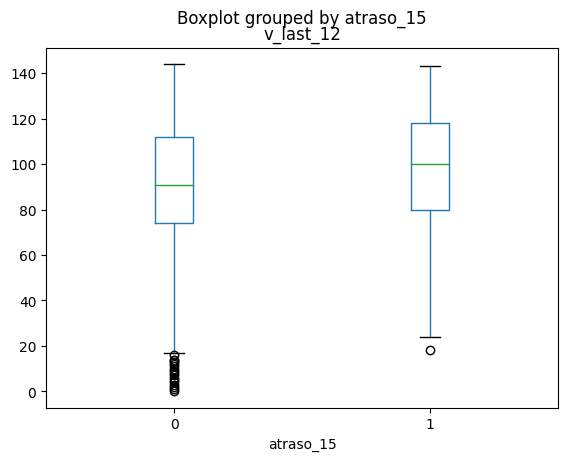

In [124]:
features_scl.boxplot(by ='atraso_15', column =['v_last_12'], grid = False)

<AxesSubplot: title={'center': 'v_last_6'}, xlabel='atraso_15'>

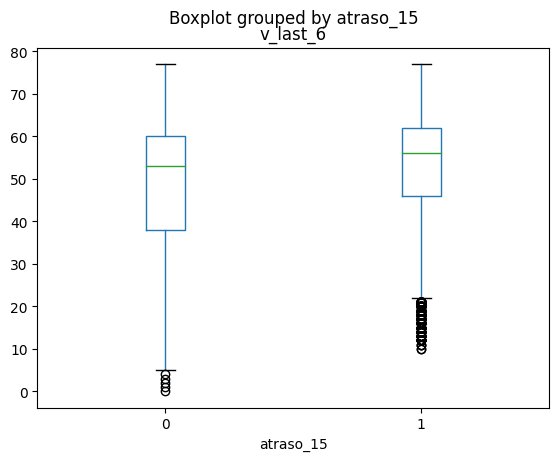

In [125]:
features_scl.boxplot(by ='atraso_15', column =['v_last_6'], grid = False)

<AxesSubplot: title={'center': 'v_last_3'}, xlabel='atraso_15'>

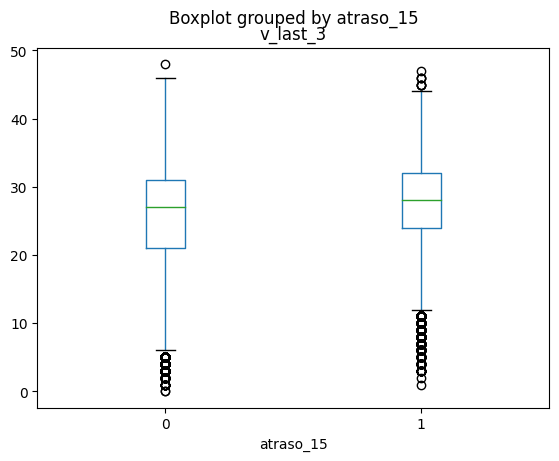

In [126]:
features_scl.boxplot(by ='atraso_15', column =['v_last_3'], grid = False)

<AxesSubplot: title={'center': 'v_next_12'}, xlabel='atraso_15'>

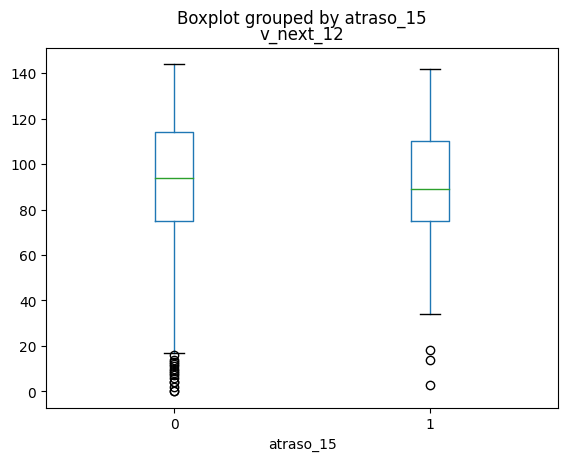

In [127]:
features_scl.boxplot(by ='atraso_15', column =['v_next_12'], grid = False)

<AxesSubplot: title={'center': 'v_next_6'}, xlabel='atraso_15'>

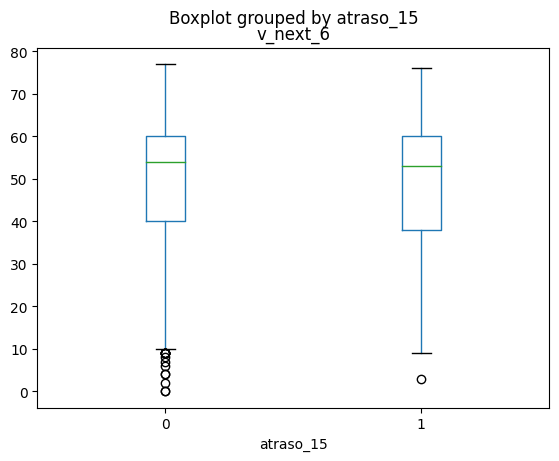

In [128]:
features_scl.boxplot(by ='atraso_15', column =['v_next_6'], grid = False)

<AxesSubplot: title={'center': 'v_next_3'}, xlabel='atraso_15'>

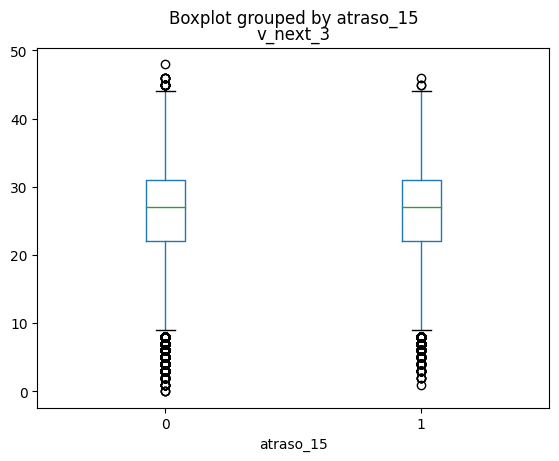

In [129]:
features_scl.boxplot(by ='atraso_15', column =['v_next_3'], grid = False)

Según los boxplots, la feature de vuelos en las últimas 6 horas es la que mejor separa las dos clases (atraso vs no-atraso). Mientras que las features que muestran los vuelos de las siguientes n horas, no muestran una correlación con el atraso.